## Import required module and dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

In [48]:
url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wh = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [49]:
data = pd.read_csv(url_red, delimiter= ';')
red = data

In [50]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA90BED240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CA91C7DF98>]], dtype=object)

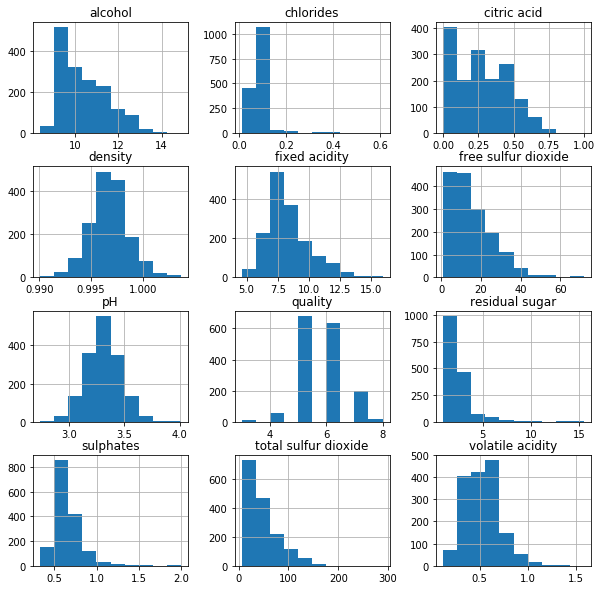

In [51]:
red.hist(figsize=(10, 10), layout=(4, 3))

## Preprocessing

### 1. Missing values Check 

In [52]:
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [53]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2. Create new column (label) 

In [54]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [55]:
# quality values mapping
# 3, 4, 5 are equal to 0 and 6, 7, 8  are equal to 1
# 1 for good quality and 0 for not good quality
red['good_wine'] = red.quality.map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1}) 

In [56]:
red.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
259,10.0,0.31,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7,1
1378,7.2,0.45,0.15,2.0,0.078,10.0,28.0,0.99609,3.29,0.51,9.9,6,1
1535,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,6,1
717,7.6,0.46,0.11,2.6,0.079,12.0,49.0,0.99680,3.21,0.57,10.0,5,0
111,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8,5,0
1050,7.1,0.43,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,5,0
805,8.2,0.28,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7,1
819,9.1,0.66,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,5,0
1245,7.4,0.55,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5,0
395,12.0,0.37,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7,1


In [57]:
#Good wine value distribution
red.good_wine.value_counts()

1    855
0    744
Name: good_wine, dtype: int64

### 3. Split data into train and test set

In [58]:
X = red.drop(['quality','good_wine'], axis = 1)
y = red['good_wine']

In [59]:
#Train(50%), Test(50%) dataset split by shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 123, shuffle = True)

### 4. Normalization

In [60]:
#Independent Variables Standarsation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## Parameter selection for KNN model

In [61]:
# since only one ML technique is used, we don't need to use pipeline method here
# Next cell includes new code for model and parameter selection, please have a look! 
neighbors = list(np.arange(1, 500, 5))
param_grid = {'n_neighbors':neighbors}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid.fit(X_train_norm, y_train)

In [62]:
print("Highest Accuracy: %f with the %d of neighbors\n" %(grid_result.best_score_, grid_result.best_params_['n_neighbors']))
for param, name, score in grid_result.grid_scores_:
    print("Accuracy: %f\tusing %r" %(score.mean(),param))

Highest Accuracy: 0.757196 with the 51 of neighbors

Accuracy: 0.719583	using {'n_neighbors': 1}
Accuracy: 0.715715	using {'n_neighbors': 6}
Accuracy: 0.752193	using {'n_neighbors': 11}
Accuracy: 0.738513	using {'n_neighbors': 16}
Accuracy: 0.740998	using {'n_neighbors': 21}
Accuracy: 0.737146	using {'n_neighbors': 26}
Accuracy: 0.729693	using {'n_neighbors': 31}
Accuracy: 0.734708	using {'n_neighbors': 36}
Accuracy: 0.747240	using {'n_neighbors': 41}
Accuracy: 0.748529	using {'n_neighbors': 46}
Accuracy: 0.757256	using {'n_neighbors': 51}
Accuracy: 0.745982	using {'n_neighbors': 56}
Accuracy: 0.749709	using {'n_neighbors': 61}
Accuracy: 0.749678	using {'n_neighbors': 66}
Accuracy: 0.743467	using {'n_neighbors': 71}
Accuracy: 0.750967	using {'n_neighbors': 76}
Accuracy: 0.739709	using {'n_neighbors': 81}
Accuracy: 0.745920	using {'n_neighbors': 86}
Accuracy: 0.744724	using {'n_neighbors': 91}
Accuracy: 0.749756	using {'n_neighbors': 96}
Accuracy: 0.742287	using {'n_neighbors': 101}
Acc

C:\Users\min\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [63]:
# Best Model Selection
best_knn = grid_result.best_estimator_
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=51, p=2,
           weights='uniform')

In [64]:
y_pred = best_knn.predict(X_test_norm)

In [65]:
cm = confusion_matrix(y_pred, y_test) # should use y_pred as 1st parameter and y_test 2nd, please double check
print('Confusion Matrix \n   TP  TN\n', cm,'\n   FP  FN')

Confusion Matrix 
   TP  TN
 [[254  88]
 [133 325]] 
   FP  FN


In [70]:
# Generalisation Error Rate
print(1-best_knn.score(X_test_norm, y_test))

0.27625
